# Caso de estudio Módulo 2 – Aprendizaje Supervisado
por: Osiris Contreras Trillos, Maritza Zapata, Juan José Molina, David Toro

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

La compañía E-Corp cuya principal operación es la venta de producto de lujo, ha lanzado desde hace
un año su sito de e-commerce donde ofrecen una variedad importante de los productos que pueden
encontrarse en sus tiendas físicas. El objetivo de esta estrategia es expandir su base de clientes
actuales, a través de nuevos canales de compra y tener mayor cobertura en sitios donde no se
encuentran tiendas físicas actualmente.
Sin embargo, en los últimos informes presentados a la dirección, se evidencia que las ventas que son
atribuidas al canal digital (e-commerce) no representan un porcentaje importante de participación
con respecto al total de las ventas. Esto ha hecho que el retorno a la inversión realizada para la
creación y mantenimiento del sitio web no sea la esperada por los directivos. El área encargada del
canal digital, considera que las campañas de marketing no están siendo efectivas y este gasto
representa un rubro importante que puede llegar a optimizarse. Estas son algunas de las hipótesis que
el equipo de canales digitales cree sobre el problema de ventas:
● Actualmente las campañas de marketing enfocadas a la adquisición de nuevos clientes utilizan
atributos muy generales que pueden no ser relevantes para influir en la decisión de compra.
● No se tiene claro cuáles son los clientes potenciales o con mayor probabilidad de realizar una
compra una vez visiten el sitio web, por lo tanto la inversión en pauta puede no estar llegando
a los clientes que generan ingresos.
Por ello, la dirección ha contratado a su equipo de consultores para abordar el problema descrito a
través del uso de modelos de ML. En otras palabras, quieren conocer si pueden anticiparse a la
identificación de clientes potenciales y así optimizar su inversión en pauta digital utilizando atributos
que describan mejor a estos clientes potenciales.

## a. Diseño de solución propuesto
El diseño de solución propuesto para abordar el problema de E-Corp con respecto a la optimización de su inversión en el canal digital consta de los siguientes pasos:

Análisis de datos:

Se realizará un análisis exploratorio de los datos disponibles para comprender su estructura y encontrar patrones relevantes.
Selección de características:

Se identificarán las características más importantes que describan a los clientes potenciales, incluyendo variables demográficas y de comportamiento en el sitio web.
Preprocesamiento de datos:

Se limpiarán los datos y se realizará el preprocesamiento necesario, como la codificación de variables categóricas y el manejo de valores faltantes.
Modelado de Machine Learning:

Se utilizarán técnicas de aprendizaje supervisado, como Regresión Logística o Árboles de Decisión, para construir un modelo predictivo que identifique a los clientes potenciales.
Evaluación del modelo:

Se evaluará el rendimiento del modelo utilizando métricas de clasificación como precisión, recall y F1-score, asegurando que pueda identificar efectivamente a los clientes potenciales.
Optimización de inversión en pauta digital:

Se utilizarán las predicciones del modelo para dirigir las campañas de marketing a los segmentos de clientes identificados como potenciales compradores, mejorando así la eficacia de las campañas y el retorno de la inversión.
Iteración y mejora continua:

Este enfoque integral combina análisis de datos, modelado de machine learning y optimización estratégica para abordar el desafío específico de E-Corp y mejorar su rendimiento en el canal digital.

## b. Limpieza y transformación de los datos

In [3]:
# Cargar data, especificando que la primera fila es una fila de encabezados
url = "https://raw.githubusercontent.com/osiris-contreras/Osiris-Contreras-Trillos-/main/ecommerce-data.csv"
names = ['Reviews', 'Reviews_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Purchase']
df_original = pd.read_csv(url, names=names, header=0)
print(df_original.shape)

(12330, 18)


In [4]:
# Tamaño del dataset
print('Numero de filas:', df_original.shape[0]," ",'Numero de columnas:', df_original.shape[1])

Numero de filas: 12330   Numero de columnas: 18


In [5]:
# Información general del dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Basándonos en los resultados de info, vemos que no hay valores nulos en los datos y los diferentes tipos de datos de las columnas

In [6]:
# Descripción estadística general de las variables numéricas
df_original.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# Descripción estadística general de las variables categóricas
df_original.describe(include=['object'])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


Basándonos en los resultados de la descripción, vemos que estas variables son las primeras y más frecuentes en el conjunto de datos: May y Returnin_Visitor

## análisis exploratorio de los datos

In [8]:
# Separación de variables númericas y categóricas
cats = ['Month', 'VisitorType']
nums = ['Reviews','Reviews_Duration',	'Informational', 'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay',	'OperatingSystems',	'Browser',	'Region', 'TrafficType']

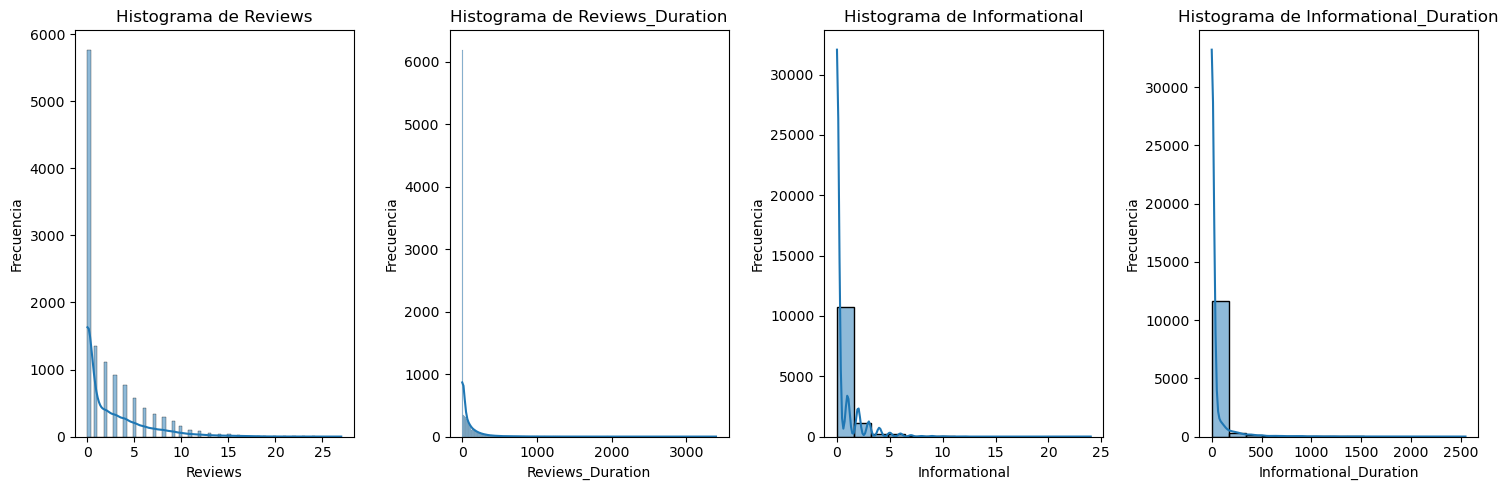

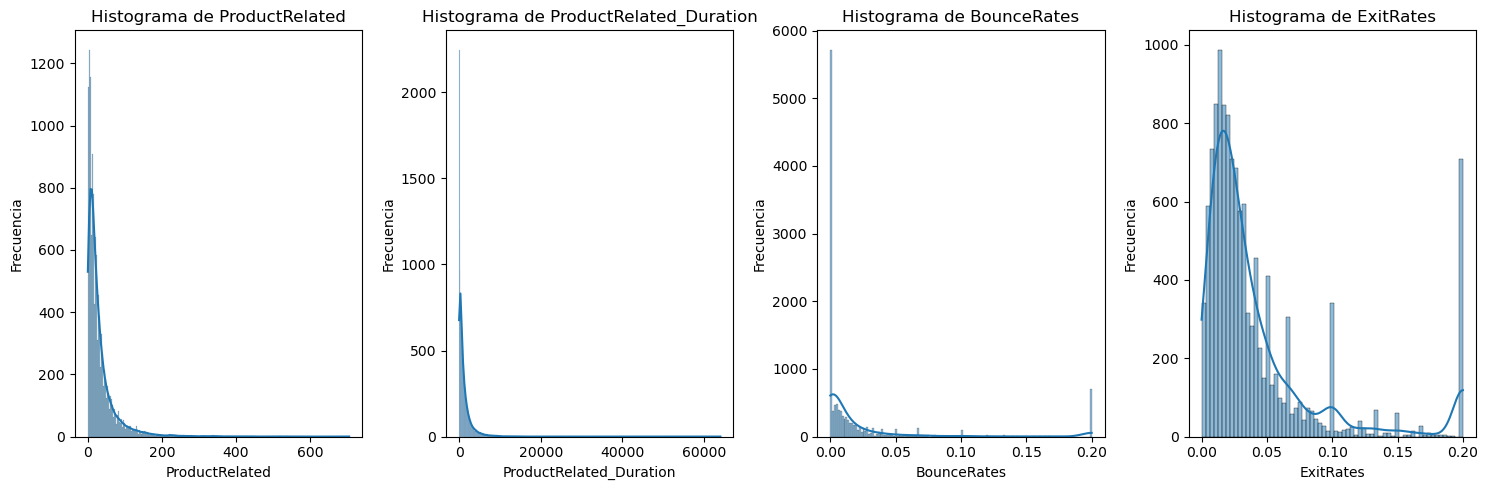

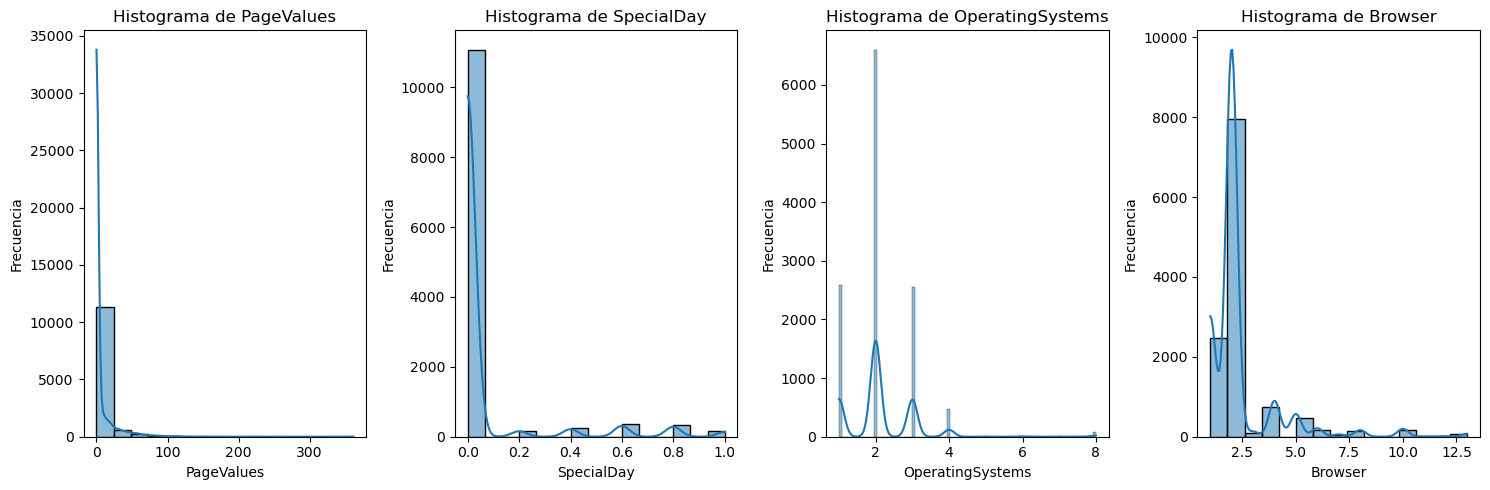

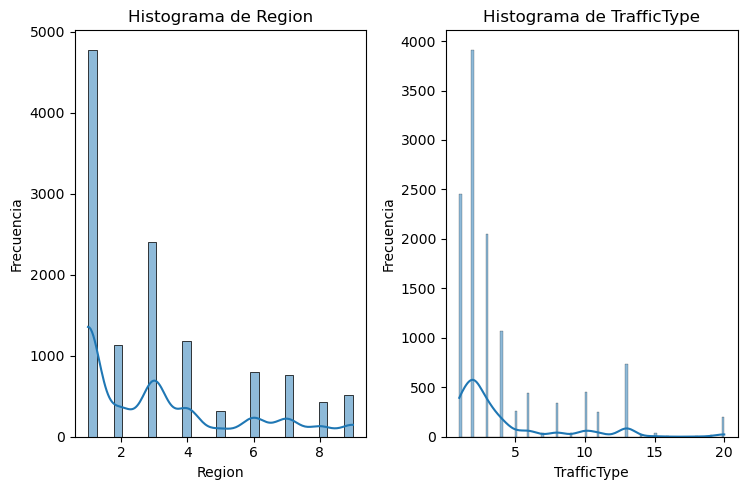

In [9]:
# Configurar el número de columnas en la disposición de subplots
num_columnas = 4

# Histogramas para variables numéricas
for i, num_var in enumerate(nums):
    if i % num_columnas == 0:
        plt.figure(figsize=(15, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.histplot(df_original[num_var], kde=True)
    plt.title(f'Histograma de {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('Frecuencia')
    if (i + 1) % num_columnas == 0 or i == len(nums) - 1:
        plt.tight_layout()
        plt.show()

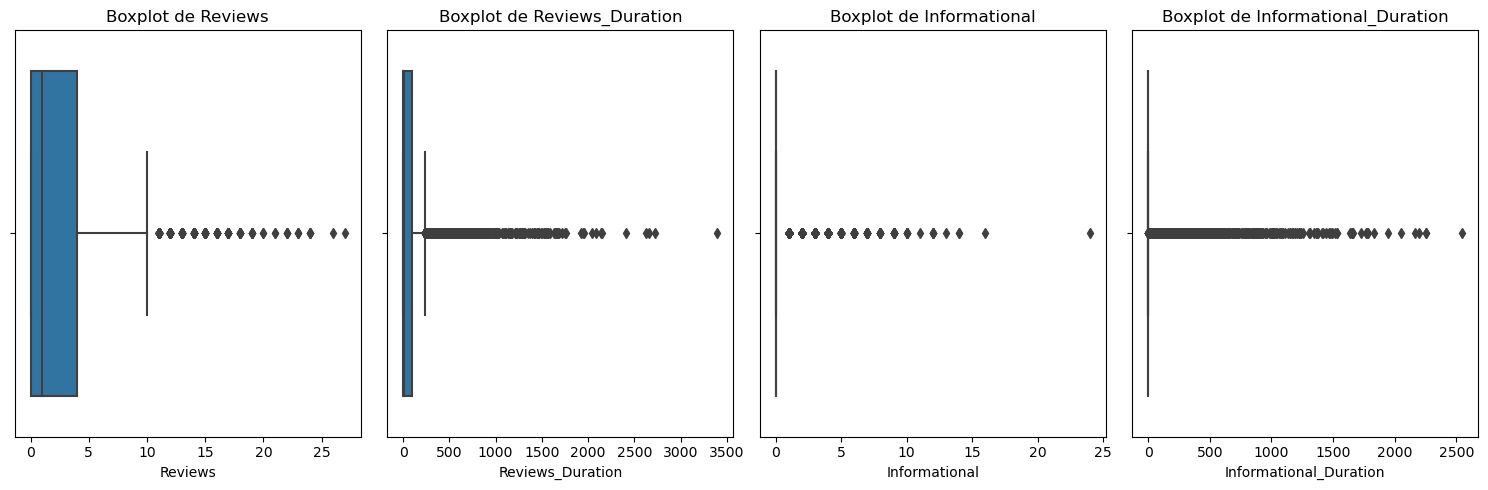

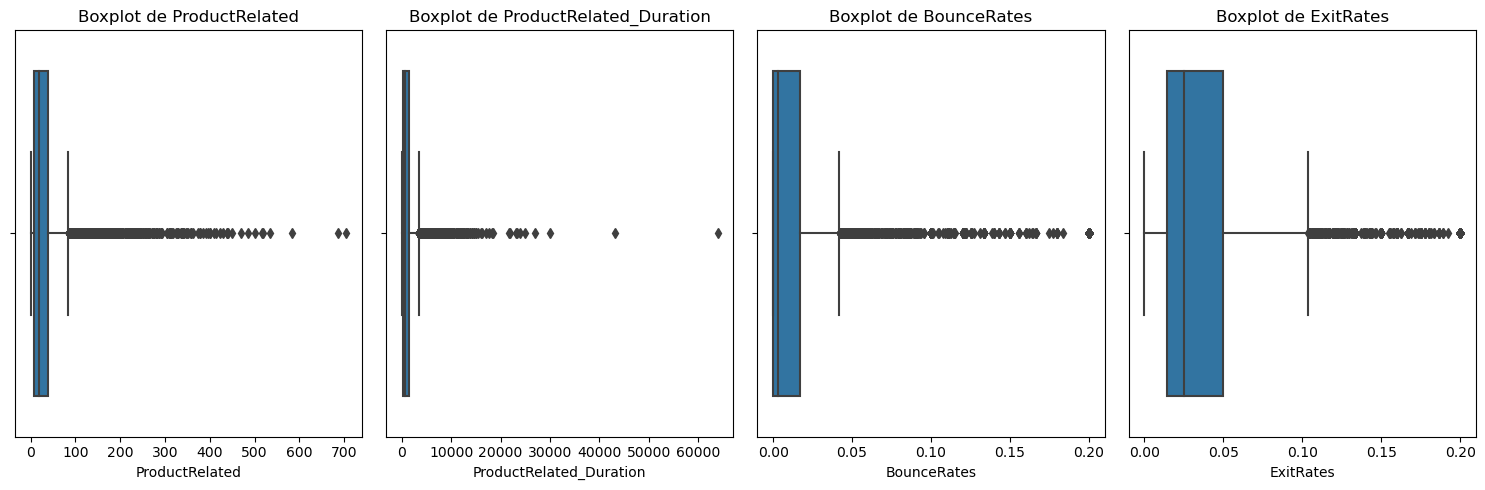

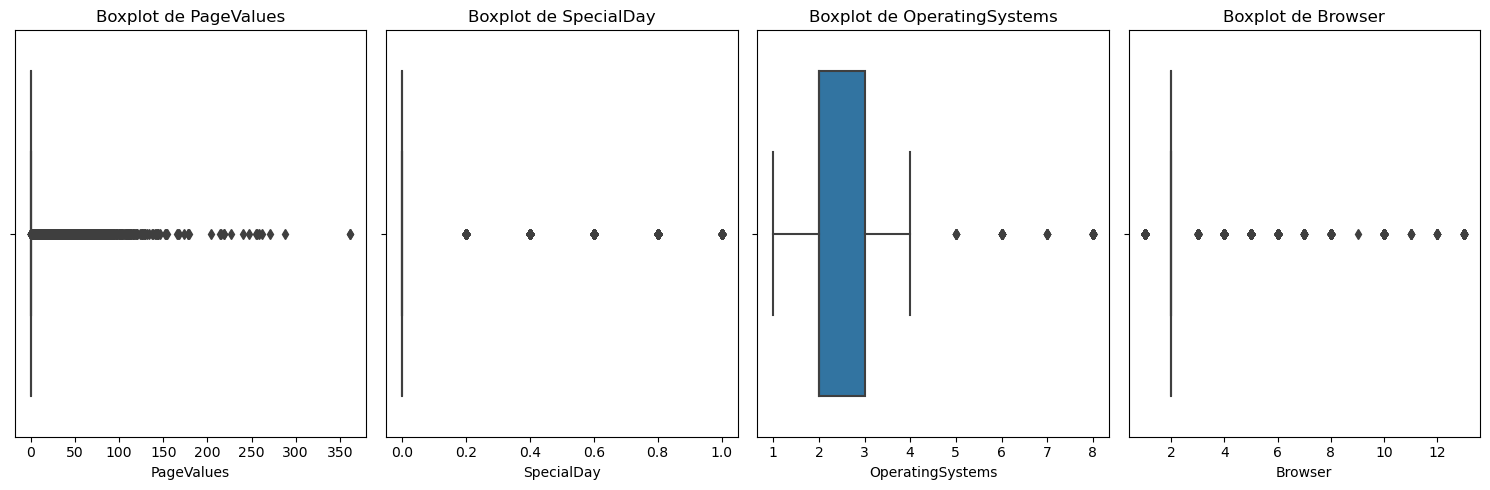

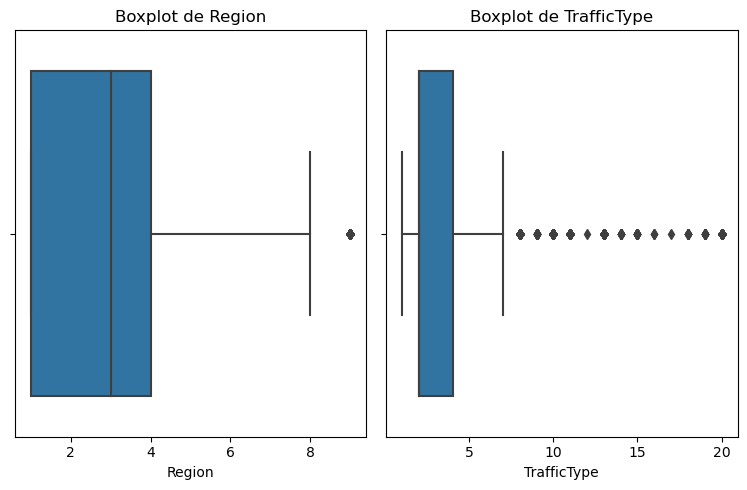

In [10]:
# Boxplots para variables numéricas
for i, num_var in enumerate(nums):
    if i % num_columnas == 0:
        plt.figure(figsize=(15, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.boxplot(x=df_original[num_var])
    plt.title(f'Boxplot de {num_var}')
    plt.xlabel(num_var)
    if (i + 1) % num_columnas == 0 or i == len(nums) - 1:
        plt.tight_layout()
        plt.show()

como se observa en los boxplots, todas las columnas contienen en su mayoría datos atípicos


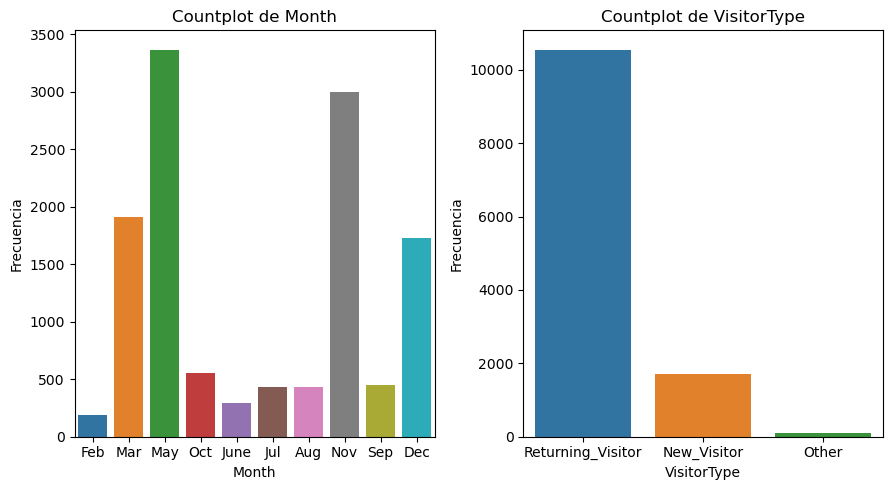

In [11]:
# Countplots para variables categóricas
for i, cat_var in enumerate(cats):
    if i % num_columnas == 0:
        plt.figure(figsize=(18, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.countplot(x=cat_var, data=df_original)
    plt.title(f'Countplot de {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Frecuencia')
    if (i + 1) % num_columnas == 0 or i == len(cats) - 1:
        plt.tight_layout()
        plt.show()

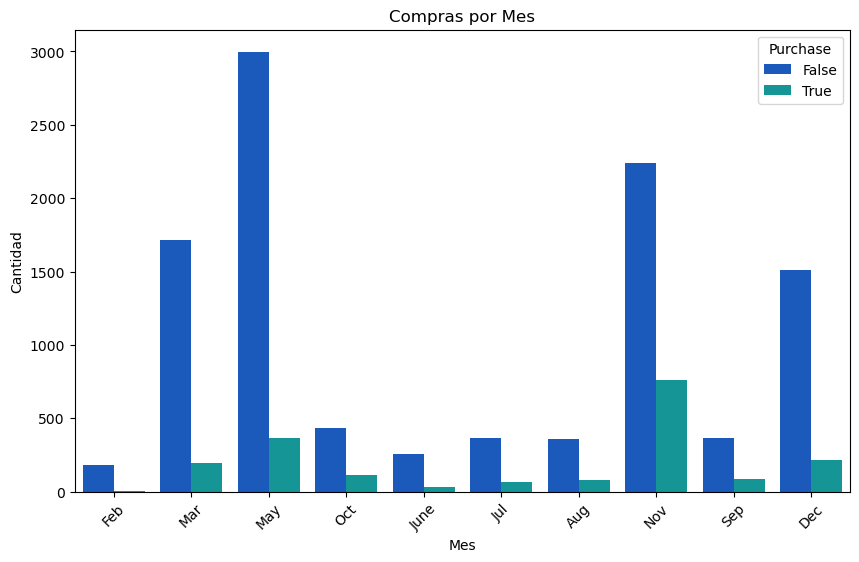

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para el mes de compra
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Purchase',palette='winter', data=df_original)
plt.title('Compras por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

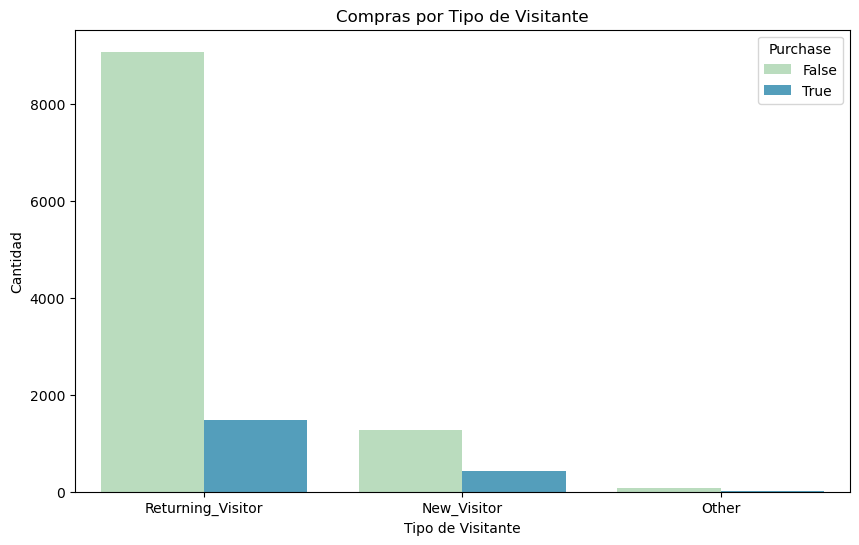

In [13]:
# Gráfico de barras apiladas para el tipo de usuario y compras
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='Purchase',palette='GnBu', data=df_original)
plt.title('Compras por Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Cantidad')
plt.show()

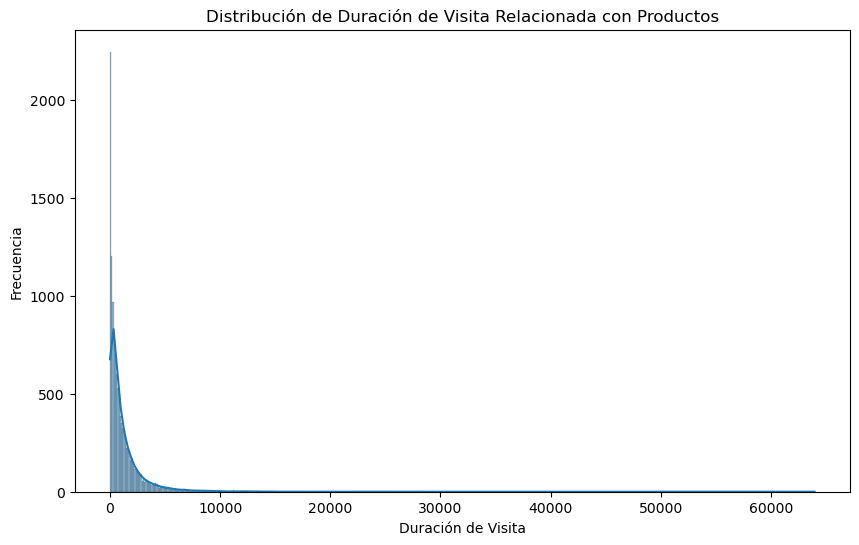

In [14]:
# Gráfico de distribución para la duración de la visita relacionada con productos
plt.figure(figsize=(10, 6))
sns.histplot(data=df_original, x='ProductRelated_Duration',palette='PuBu', kde=True)
plt.title('Distribución de Duración de Visita Relacionada con Productos')
plt.xlabel('Duración de Visita')
plt.ylabel('Frecuencia')
plt.show()

## Limpieza y transformación de los datos

In [15]:
df= df_original.copy()

In [16]:
# Comprobación de valores duplicados
df.duplicated().sum()

125

In [17]:
# Eliminación de valores duplicados
df2 = df.drop_duplicates()

# Comprobación de valores duplicados
df2.duplicated().sum()
df2.shape

(12205, 18)

In [18]:
# Copia del dataset para aplicar transformaciones y limpieza de datos
df1 = df_original.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
label_encoder = LabelEncoder()
df1['Month'] = label_encoder.fit_transform(df1['Month'])
df1['VisitorType'] = label_encoder.fit_transform(df1['VisitorType'])

# Conversión de datos booleanos a numéricos
df1['Weekend'] = df1['Weekend'].astype(int)
df1['Purchase'] = df1['Purchase'].astype(int)

print(df1.head())

   Reviews  Reviews_Duration  Informational  Informational_Duration  \
0        0               0.0              0                     0.0   
1        0               0.0              0                     0.0   
2        0               0.0              0                     0.0   
3        0               0.0              0                     0.0   
4        0               0.0              0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0               1                 0.000000         0.20       0.20   
1               2                64.000000         0.00       0.10   
2               1                 0.000000         0.20       0.20   
3               2                 2.666667         0.05       0.14   
4              10               627.500000         0.02       0.05   

   PageValues  SpecialDay  Month  OperatingSystems  Browser  Region  \
0         0.0         0.0      2                 1        1       1   
1         

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [21]:
df1.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar las características numéricas a normalizar o estandarizar
caracteristicas_numericas = df1[names]

# Inicializar el escalador MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalizar las características utilizando MinMaxScaler
caracteristicas_numericas_normalizadas = min_max_scaler.fit_transform(caracteristicas_numericas)

# Inicializar el escalador StandardScaler
standard_scaler = StandardScaler()

# Estandarizar las características utilizando StandardScaler
caracteristicas_numericas_estandarizadas = standard_scaler.fit_transform(caracteristicas_numericas_normalizadas)

# Convertir las características normalizadas y estandarizadas de nuevo a un DataFrame de pandas
nuevo_df = pd.DataFrame(caracteristicas_numericas_estandarizadas, columns= names)

# Mostrar las primeras filas del DataFrame con características estandarizadas y normalizadas
print("\nCaracterísticas estandarizadas:")
print(nuevo_df.info())


Características estandarizadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  float64
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  float64
 13  Region                   12330 non-null  fl

## Preparación de los datos

In [23]:
# Comprobación de valores duplicados
nuevo_df.duplicated().sum()

125

In [24]:
# Eliminación de valores duplicados
nuevo_df = df1.drop_duplicates()

# Comprobación de valores duplicados
nuevo_df.duplicated().sum()

0

In [25]:
# Separación de caracteristicas y target (X , y)
y = nuevo_df['Purchase']
X = nuevo_df.drop(['Purchase'],axis=1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de validación:",  x_test.shape)


Tamaño del conjunto de entrenamiento: (9764, 17)
Tamaño del conjunto de validación: (2441, 17)


In [26]:
# realizaremos tratamiento de datos atípicos, para verificar si mejoran los resultados de los modelos. 
df2 = nuevo_df.copy()
df2.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,5.168046,2.124211,2.357804,3.153298,4.073904,1.715936,0.234248,0.156329
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,2.374071,0.906823,1.710114,2.402340,4.016654,0.693425,0.423545,0.363182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [27]:
# Definición de función que utiliza RIC para la detección de valores atípicos
def outlier_IQR(df, column, thr):
    Q1 = np.quantile(df2[column], 0.25) # first quartile
    Q3 = np.quantile(df2[column], 0.75) # third quartile
    IQR = Q3 - Q1 # inter - quartile range
    threshold = thr * IQR # defining the threshold
    lower = Q1 - threshold
    upper = Q3 + threshold
    lower_bound = df2[df2[column] < lower]
    upper_bound = df2[df2[column] > upper]

    #Imprimir IQR, threshold, lower bound, upper bound and total number of outlier
    print('IQR is:', IQR)
    print('Threshold is:', threshold)
    print('Lower bound is:', lower)
    print('Upper bound is:', upper)
    print('total number of outliers are:', lower_bound.shape[0] + upper_bound.shape[0])
    return upper, lower

In [28]:
#Obtener el IQR, el umbral, el límite inferior, el límite superior, el total de valores atípicos
upper_PageValues, lower_PageValues = outlier_IQR(df2, 'PageValues', 2)

# Eliminar valores atipicos para columna bmi
print('Antes de eliminación de Outliers:', df2.shape)
df3 = df2.loc[(df2['PageValues'] < upper_PageValues) & (df2['PageValues'] > lower_PageValues)]
print('Después de eliminación Outliers:', df3.shape)

IQR is: 0.0
Threshold is: 0.0
Lower bound is: 0.0
Upper bound is: 0.0
total number of outliers are: 2730
Antes de eliminación de Outliers: (12205, 18)
Después de eliminación Outliers: (0, 18)


El rango intercuartílico (IQR) para la columna 'PageValues' es de 0.0. Esto significa que no hay variabilidad en los datos, ya que todos los valores son similares. Por lo tanto, el umbral para detectar valores atípicos también es 0.0, lo que hace que no haya límites superior o inferior distintos de cero. Como resultado, todos los valores se consideran atípicos según este enfoque.

## Modelo 1 Regresión Logística

In [78]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# Separar las características y la variable objetivo
x = nuevo_df.drop('Purchase', axis=1)
y = df2['Purchase']

# Dividir los datos en conjuntos de entrenamiento y prueba
xtrain, xtest, ytrain,ytest  = train_test_split(x,y , test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(xtrain, ytrain)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(xtrain)

# Métricas de desempeño en el conjunto de entrenamiento
print("Desempeño en el conjunto de entrenamiento:")
print("Accuracy:", metrics.accuracy_score(ytrain, y_train_pred))
print("Classification Report:")
print(metrics.classification_report(ytrain, y_train_pred))

y_pred = modelo.predict(xtest)
# Exactitud en el conjunto de validación
print('Exactitud en la validación: %.3f'  %accuracy_score(ytest, y_pred) )
# Métricas de desempeño en el conjunto de prueba
print("\nDesempeño en el conjunto de prueba:")
print("Accuracy:", metrics.accuracy_score(ytest, y_pred))
print("Classification Report:")
print(metrics.classification_report(ytest, y_pred))

Desempeño en el conjunto de entrenamiento:
Accuracy: 0.8786358049979517
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      8218
           1       0.73      0.37      0.49      1546

    accuracy                           0.88      9764
   macro avg       0.81      0.67      0.71      9764
weighted avg       0.87      0.88      0.86      9764

Exactitud en la validación: 0.881

Desempeño en el conjunto de prueba:
Accuracy: 0.8807865628840639
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2079
           1       0.70      0.35      0.46       362

    accuracy                           0.88      2441
   macro avg       0.80      0.66      0.70      2441
weighted avg       0.87      0.88      0.86      2441



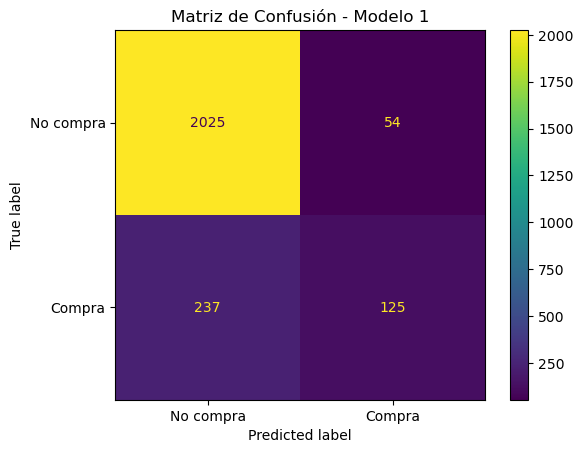

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc = confusion_matrix(ytest, y_pred)

mc_display = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=['No compra', 'Compra'])
mc_display.plot()
plt.title('Matriz de Confusión - Modelo 1')
plt.show()

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
# Calcular el área bajo la curva ROC (AUC)
auc1 = roc_auc_score(ytest, y_pred)
# Imprimir el AUC
print("Área bajo la curva ROC (AUC):", auc1)

Área bajo la curva ROC (AUC): 0.6596649207146444


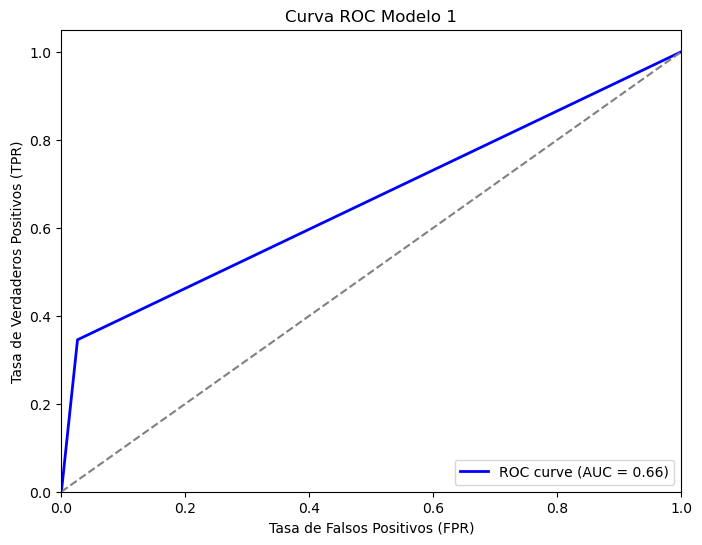

In [85]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Modelo 1')
plt.legend(loc="lower right")
plt.show()

# Clasificación

## selección de características Variance Threshold

In [93]:
from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(X,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(X)
    new_cols = var_thres.get_support()
    return new_cols

In [34]:
# Para clasificación
# Obtener columnas seleccionadas
X_new_class = variance_threshold(x_train, 0.25)
# Nuevo dataframe
df_classification_new = x_train.iloc[:,X_new_class]
df_classification_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9764 entries, 1993 to 2785
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  9764 non-null   int64  
 1   Reviews_Duration         9764 non-null   float64
 2   Informational            9764 non-null   int64  
 3   Informational_Duration   9764 non-null   float64
 4   ProductRelated           9764 non-null   int64  
 5   ProductRelated_Duration  9764 non-null   float64
 6   PageValues               9764 non-null   float64
 7   Month                    9764 non-null   int32  
 8   OperatingSystems         9764 non-null   int64  
 9   Browser                  9764 non-null   int64  
 10  Region                   9764 non-null   int64  
 11  TrafficType              9764 non-null   int64  
 12  VisitorType              9764 non-null   int32  
dtypes: float64(4), int32(2), int64(7)
memory usage: 991.7 KB


## Modelo 2 DecisionTreeClassifier

In [35]:
# Importar Librerias
# ==============================================================================
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

# Añadir la variable objetivo al DataFrame df_classification_new
df_classification_new['Purchase'] = nuevo_df['Purchase']

# Separar las características y la variable objetivo
variables = df_classification_new.drop('Purchase', axis=1)
objetivo = df_classification_new['Purchase']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento,y_prueba  = train_test_split(variables,objetivo , test_size=0.2, random_state=42)


In [36]:
# Entrenamiento del modelo
# ==============================================================================
clf = tree.DecisionTreeClassifier(
          criterion = 'gini',
          max_depth = 6,
          max_leaf_nodes=10,
          random_state=0)
clf.fit(X_entrenamiento, y_entrenamiento)
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_entrenamiento, clf.predict(X_entrenamiento)))
print ("Train - classification report:\n", metrics.classification_report(y_entrenamiento, clf.predict(X_entrenamiento), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_prueba, clf.predict(X_prueba)))
print ("Test - classification report :\n", metrics.classification_report(y_prueba, clf.predict(X_prueba), digits=4))

Train - Accuracy : 0.9021892203303035
Train - classification report:
               precision    recall  f1-score   support

           0     0.9452    0.9386    0.9419      6594
           1     0.6793    0.7050    0.6919      1217

    accuracy                         0.9022      7811
   macro avg     0.8123    0.8218    0.8169      7811
weighted avg     0.9038    0.9022    0.9029      7811

Test - Accuracy : 0.8883768561187916
Test - classification report :
               precision    recall  f1-score   support

           0     0.9346    0.9323    0.9335      1640
           1     0.6498    0.6581    0.6540       313

    accuracy                         0.8884      1953
   macro avg     0.7922    0.7952    0.7937      1953
weighted avg     0.8890    0.8884    0.8887      1953



Text(0.5, 0, 'DecisionTreeClassifier')

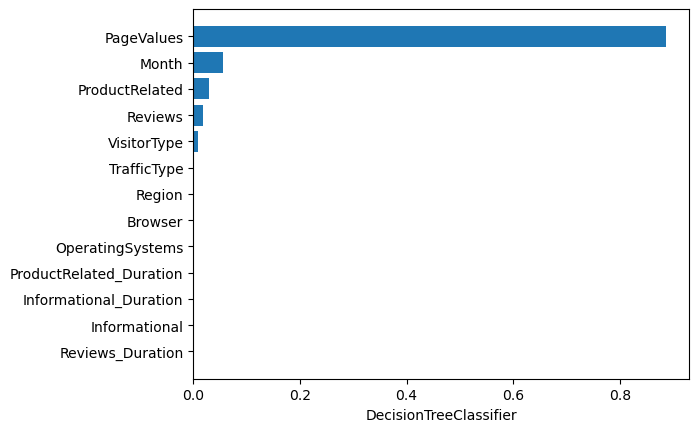

In [75]:
# Importancia de las variables
importance = clf.feature_importances_
sorted_idx = clf.feature_importances_.argsort()
plt.barh(variables.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("DecisionTreeClassifier")

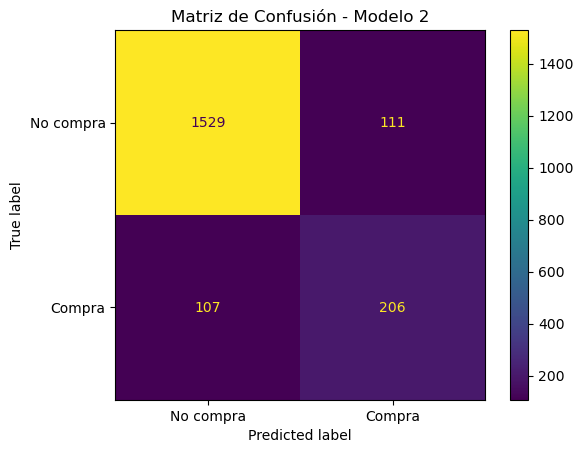

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_prueba, clf.predict(X_prueba))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels=['No compra', 'Compra'])
cm1_display.plot()
plt.title('Matriz de Confusión - Modelo 2')
plt.show()


In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_prueba, clf.predict(X_prueba))
# Calcular el área bajo la curva ROC (AUC)
auc2 = roc_auc_score(y_prueba, clf.predict(X_prueba))
# Imprimir el AUC
print("Área bajo la curva ROC (AUC):", auc2)

Área bajo la curva ROC (AUC): 0.795232019013481


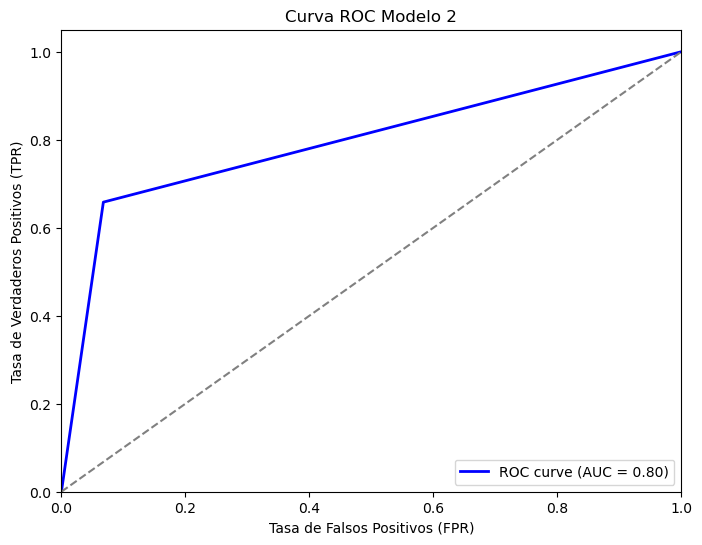

In [87]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Modelo 2')
plt.legend(loc="lower right")
plt.show()

## Modelo 3 GradientBoostingClassifier

In [40]:
# Importar el modelo Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Crear una instancia del modelo Gradient Boosting
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Número de árboles a utilizar (puedes ajustar este valor)
    learning_rate=0.1,  # Tasa de aprendizaje (puedes ajustar este valor)
    max_depth=3,  # Profundidad máxima de cada árbol (puedes ajustar este valor)
    random_state=42  # Semilla aleatoria para reproducibilidad
)

# Entrenar el modelo
gb_classifier.fit(X_entrenamiento, y_entrenamiento)

# Predicciones en el conjunto de entrenamiento
predicciones_entrenamiento = gb_classifier.predict(X_entrenamiento)

# Métricas de desempeño en el conjunto de entrenamiento
print("Desempeño en el conjunto de entrenamiento:")
print("Accuracy:", metrics.accuracy_score(y_entrenamiento, predicciones_entrenamiento))
print("Classification Report:")
print(metrics.classification_report(y_entrenamiento, predicciones_entrenamiento))

# Predicciones en el conjunto de prueba
predicciones_prueba = gb_classifier.predict(X_prueba)

# Métricas de desempeño en el conjunto de prueba
print("\nDesempeño en el conjunto de prueba:")
print("Accuracy:", metrics.accuracy_score(y_prueba, predicciones_prueba))
print("Classification Report:")
print(metrics.classification_report(y_prueba, predicciones_prueba))

Desempeño en el conjunto de entrenamiento:
Accuracy: 0.9183203175009602
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6594
           1       0.77      0.67      0.72      1217

    accuracy                           0.92      7811
   macro avg       0.86      0.82      0.84      7811
weighted avg       0.91      0.92      0.92      7811


Desempeño en el conjunto de prueba:
Accuracy: 0.883768561187916
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1640
           1       0.66      0.57      0.61       313

    accuracy                           0.88      1953
   macro avg       0.79      0.76      0.77      1953
weighted avg       0.88      0.88      0.88      1953



Text(0.5, 0, 'GradientBoostingClassifier')

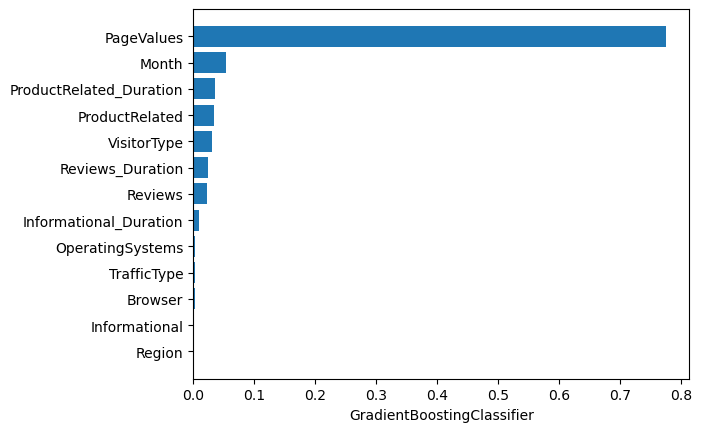

In [77]:
# Importancia de las variables
importance = gb_classifier.feature_importances_
sorted_idx = gb_classifier.feature_importances_.argsort()
plt.barh(variables.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("GradientBoostingClassifier")

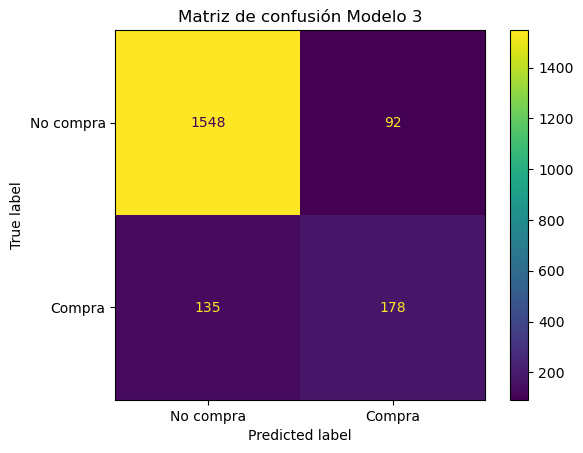

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_prueba, gb_classifier.predict(X_prueba))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels=['No compra', 'Compra'])
cm1_display.plot()
plt.title('Matriz de confusión Modelo 3')
plt.show()

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_prueba, gb_classifier.predict(X_prueba))
# Calcular el área bajo la curva ROC (AUC)
auc3 = roc_auc_score(y_prueba, gb_classifier.predict(X_prueba))
# Imprimir el AUC
print("Área bajo la curva ROC (AUC):", auc3)

Área bajo la curva ROC (AUC): 0.7562962674355178


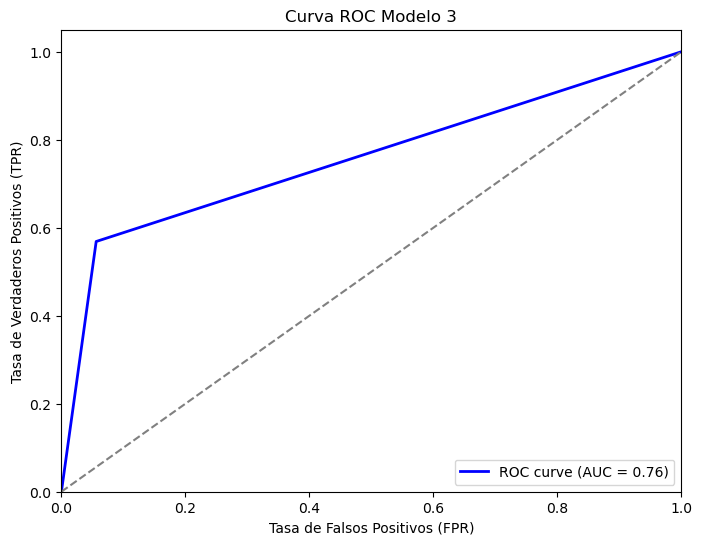

In [89]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Modelo 3')
plt.legend(loc="lower right")
plt.show()

## Modelo 4 Random Forest Classifier

In [44]:
# Importar el modelo Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Número de árboles a utilizar (puedes ajustar este valor)
    max_depth=10,  # Profundidad máxima de cada árbol (puedes ajustar este valor)
    random_state=42  # Semilla aleatoria para reproducibilidad
)
# Entrenar el modelo
rf_classifier.fit(X_entrenamiento, y_entrenamiento)

# Predicciones en el conjunto de entrenamiento
prediccionesentrenamiento = rf_classifier.predict(X_entrenamiento)

# Métricas de desempeño en el conjunto de entrenamiento
print("Desempeño en el conjunto de entrenamiento:")
print("Accuracy:", metrics.accuracy_score(y_entrenamiento, prediccionesentrenamiento))
print("Classification Report:")
print(metrics.classification_report(y_entrenamiento, prediccionesentrenamiento))

# Predicciones en el conjunto de prueba
prediccionesprueba = rf_classifier.predict(X_prueba)

# Métricas de desempeño en el conjunto de prueba
print("\nDesempeño en el conjunto de prueba:")
print("Accuracy:", metrics.accuracy_score(y_prueba, prediccionesprueba))
print("Classification Report:")
print(metrics.classification_report(y_prueba, prediccionesprueba))

Desempeño en el conjunto de entrenamiento:
Accuracy: 0.9526309051337857
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6594
           1       0.93      0.76      0.83      1217

    accuracy                           0.95      7811
   macro avg       0.94      0.87      0.90      7811
weighted avg       0.95      0.95      0.95      7811


Desempeño en el conjunto de prueba:
Accuracy: 0.8919610855094726
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1640
           1       0.71      0.56      0.62       313

    accuracy                           0.89      1953
   macro avg       0.81      0.76      0.78      1953
weighted avg       0.88      0.89      0.89      1953



Text(0.5, 0, 'RandomForestClassifier')

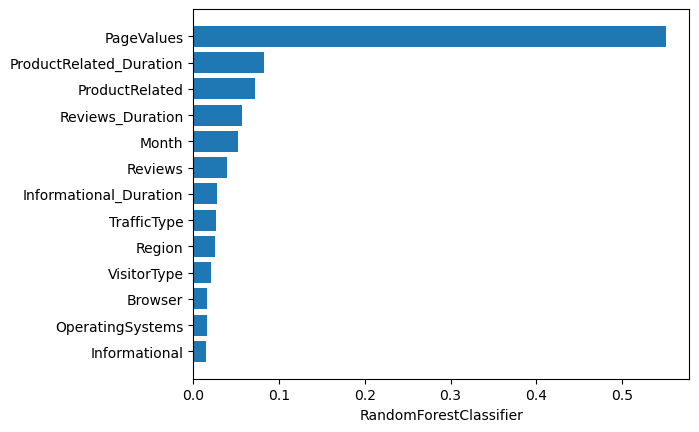

In [96]:
# Importancia de las variables
importance = rf_classifier.feature_importances_
sorted_idx = rf_classifier.feature_importances_.argsort()
plt.barh(variables.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("RandomForestClassifier")

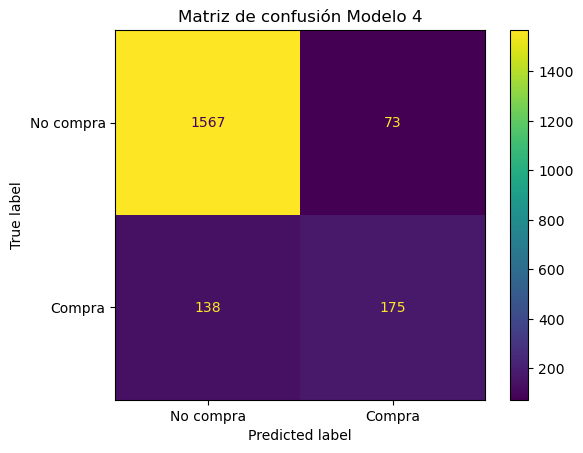

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_prueba, rf_classifier.predict(X_prueba))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels=['No compra', 'Compra'])
cm1_display.plot()
plt.title('Matriz de confusión Modelo 4')
plt.show()

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_prueba, rf_classifier.predict(X_prueba))
# Calcular el área bajo la curva ROC (AUC)
auc4 = roc_auc_score(y_prueba, rf_classifier.predict(X_prueba))
# Imprimir el AUC
print("Área bajo la curva ROC (AUC):", auc4)

Área bajo la curva ROC (AUC): 0.7572966180939764


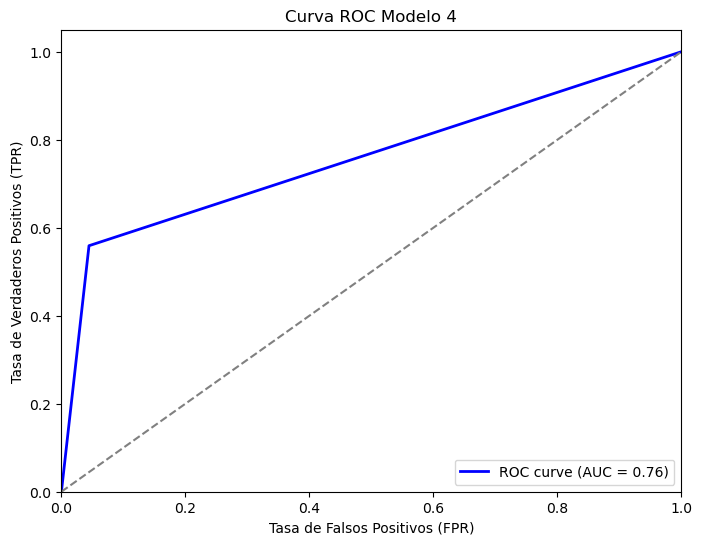

In [47]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc4)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Modelo 4')
plt.legend(loc="lower right")
plt.show()

## Estimador Lasso

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

#Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=1.5))
sel_.fit(x_train, y_train)

#Imprimir coeficientes del estimador
print("Coeficientes del estimador Lasso:")
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
best_features = X.columns[sel_.get_support()]
print(best_features)

Coeficientes del estimador Lasso:
[ 0.00000000e+00  1.39668775e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.35134808e-05 -0.00000000e+00 -0.00000000e+00
  5.13265719e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]
Index(['Reviews_Duration', 'ProductRelated_Duration', 'PageValues'], dtype='object')


Las variables 'Reviews_Duration', 'ProductRelated_Duration' y 'PageValues' son las más relevantes según el modelo Lasso y tienen un impacto significativo en la variable objetivo.
Las otras variables, cuyos coeficientes son cero o muy cercanos a cero, pueden ser menos importantes para el modelo y pueden ser candidatas para ser eliminadas.

In [49]:
#Filtrar X_train y Y_train para eliminar variables con coeficiente 0
X_new_train = sel_.transform(x_train)
X_new_test = sel_.transform(x_test)

## Modelo 5 Random Forest Classifier con estimador Lasso

In [53]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Crear una instancia del modelo Random Forest Classifier
rf_classifier_lasso = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento seleccionados
rf_classifier_lasso.fit(X_new_train, ytrain)
#ytrain,ytest 

# Realizar predicciones en el conjunto de entrenamiento seleccionado
predicciones_train = rf_classifier_lasso.predict(X_new_train)

# Realizar predicciones en el conjunto de prueba seleccionado
predicciones_test = rf_classifier_lasso.predict(X_new_test)

# Calcular y mostrar las métricas de desempeño en el conjunto de entrenamiento seleccionado
print("Desempeño en el conjunto de entrenamiento:")
print("Métricas de desempeño en el conjunto de entrenamiento seleccionado:")
print(classification_report(ytrain, predicciones_train))
print("Accuracy en el conjunto de entrenamiento seleccionado:", accuracy_score(ytrain, predicciones_train))

# Calcular y mostrar las métricas de desempeño en el conjunto de prueba seleccionado
print("\nMétricas de desempeño en el conjunto de prueba seleccionado:")
print(classification_report(ytest, predicciones_test))
print("Accuracy en el conjunto de prueba seleccionado:", accuracy_score(ytest, predicciones_test))


Desempeño en el conjunto de entrenamiento:
Métricas de desempeño en el conjunto de entrenamiento seleccionado:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8218
           1       0.98      0.85      0.91      1546

    accuracy                           0.97      9764
   macro avg       0.98      0.92      0.95      9764
weighted avg       0.97      0.97      0.97      9764

Accuracy en el conjunto de entrenamiento seleccionado: 0.9742933224088488

Métricas de desempeño en el conjunto de prueba seleccionado:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2079
           1       0.18      0.09      0.12       362

    accuracy                           0.80      2441
   macro avg       0.52      0.51      0.51      2441
weighted avg       0.76      0.80      0.78      2441

Accuracy en el conjunto de prueba seleccionado: 0.8037689471528062


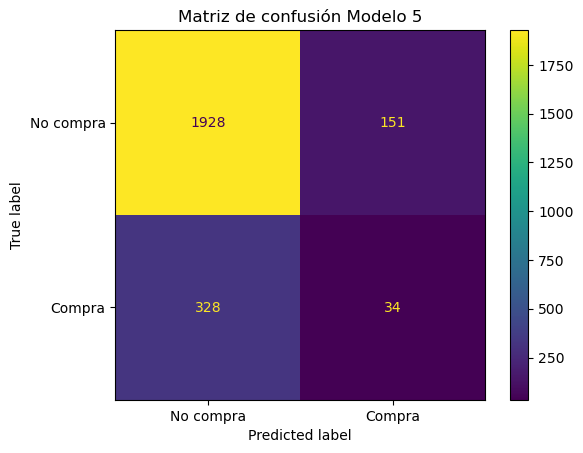

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(ytest, rf_classifier_lasso.predict(X_new_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels=['No compra', 'Compra'])
cm1_display.plot()
plt.title('Matriz de confusión Modelo 5')
plt.show()

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(ytest, predicciones_test)
# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, predicciones_test)
# Imprimir el AUC
print("Área bajo la curva ROC (AUC):", auc)


Área bajo la curva ROC (AUC): 0.5106457896513146


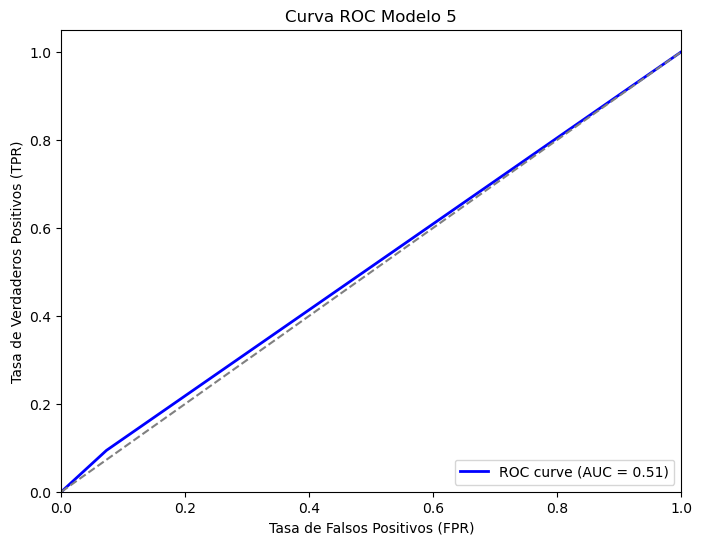

In [56]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Modelo 5')
plt.legend(loc="lower right")
plt.show()

## Comparación de modelos 

In [57]:
import matplotlib.pyplot as plt

# Definir los nombres de los modelos y sus métricas
modelos = ['Modelo1\nRegresión Logística', 'Modelo 2\nDecision Tree', 'Modelo3\nGradient Boosting', 'Modelo 4\nRandom Forest', 'Modelo 5\nRandom Forest con Lasso']
accuracy_train = [87.86, 90.22, 91.83, 95.26, 97.43]
accuracy_test = [88.08, 88.84, 88.38, 89.20, 80.38]

recall_train_0 = [0.97, 0.94, 0.96, 0.99, 1] 
recall_prueba_0 = [0.97, 0.93, 0.94, 0.96, 0.93] 

recall_train_1 = [0.37, 0.70, 0.67, 0.76, 0.85] 
recall_prueba_1 = [0.35, 0.66, 0.57, 0.56, 0.09] 

f1_score_train_0 = [0.93, 0.94, 0.95, 0.97, 0.98]  
f1_score_test_0 = [0.93, 0.93, 0.93, 0.94, 0.89]  

f1_score_train_1 = [0.49, 0.6919, 0.72, 0.83, 0.91]  
f1_score_test_1 = [0.46, 0.65, 0.61, 0.62, 0.12]  

auc_Roc = [0.6597, 0.7952, 0.7563, 0.7573, 0.5106]


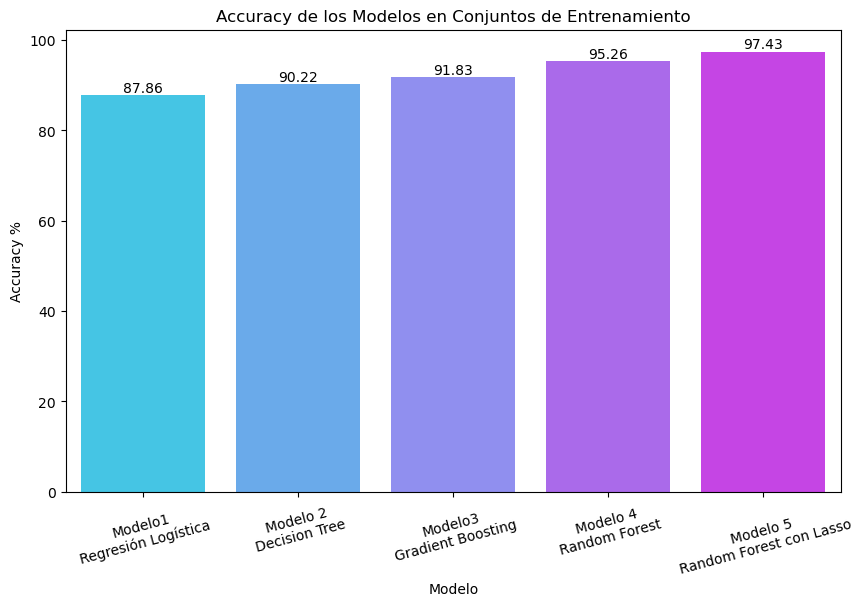

In [58]:
# Graficar el accuracy en los conjuntos de entrenamiento y prueba
plt.figure(figsize=(10, 6))
sns.barplot(x=modelos, y=accuracy_train, label='Entrenamiento', palette='cool')
plt.title('Accuracy de los Modelos en Conjuntos de Entrenamiento')
plt.xlabel('Modelo')
plt.ylabel('Accuracy %')
plt.xticks(rotation=15)
for i, v in enumerate(accuracy_train):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10) 
plt.show()


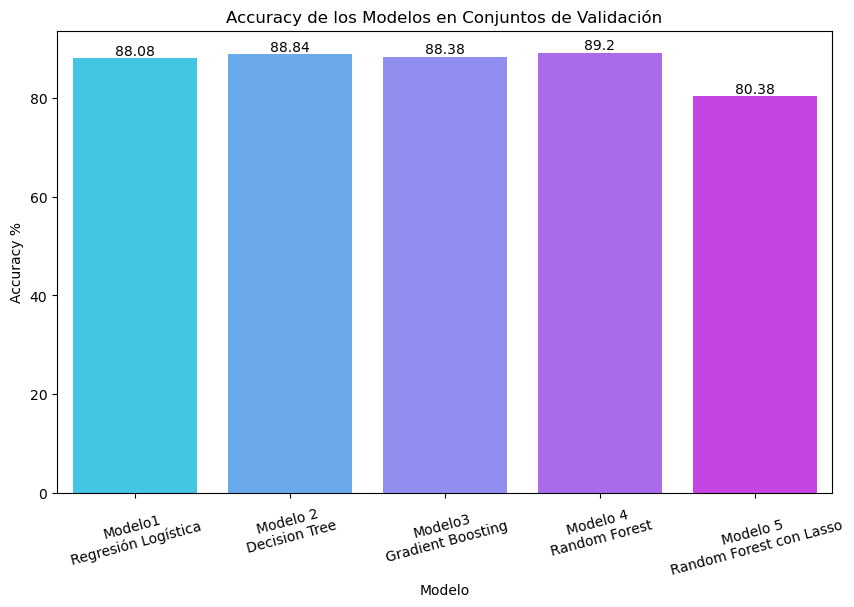

In [95]:
# Graficar el accuracy en los conjuntos de entrenamiento y prueba
plt.figure(figsize=(10, 6))
sns.barplot(x=modelos, y=accuracy_test, label='Validación', palette='cool')
plt.title('Accuracy de los Modelos en Conjuntos de Validación')
plt.xlabel('Modelo')
plt.ylabel('Accuracy %')
plt.xticks(rotation=15)
for i, v in enumerate(accuracy_test):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10) 
plt.show()

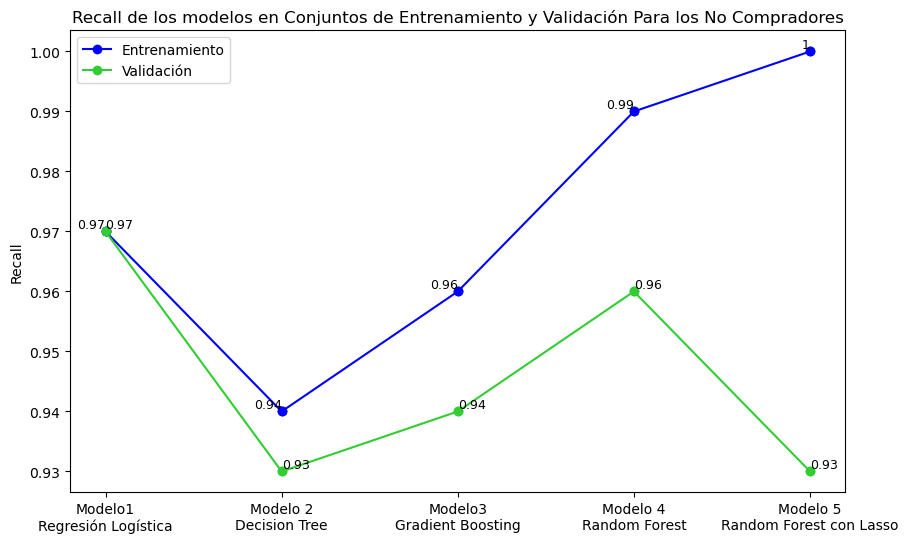

In [60]:
# Gráfico comparativo de Recall en los conjuntos de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(modelos, recall_train_0, marker='o',color='blue' , label='Entrenamiento')
plt.plot(modelos, recall_prueba_0, marker='o', color='limegreen', label='Validación')
plt.title('Recall de los modelos en Conjuntos de Entrenamiento y Validación Para los No Compradores')
plt.ylabel('Recall')
plt.xticks(rotation=0)
plt.legend()
# Graficar los puntos y agregar etiquetas de número
for i, (x, y) in enumerate(zip(modelos, recall_train_0)):
    plt.plot(x, y, marker='o', color='blue')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom')  # Agregar etiqueta de número

for i, (x, y) in enumerate(zip(modelos, recall_prueba_0)):
    plt.plot(x, y, marker='o', color='limegreen')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='left', va='bottom')  # Agregar etiqueta de número

plt.show()

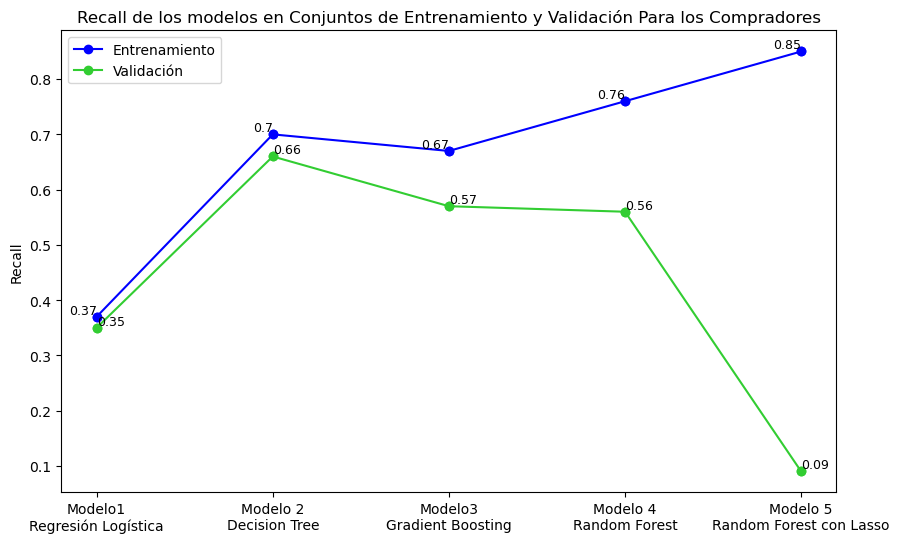

In [61]:
# Gráfico comparativo de Recall en los conjuntos de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(modelos, recall_train_1, marker='o',color='blue' , label='Entrenamiento')
plt.plot(modelos, recall_prueba_1, marker='o', color='limegreen', label='Validación')
plt.title('Recall de los modelos en Conjuntos de Entrenamiento y Validación Para los Compradores')
plt.ylabel('Recall')
plt.xticks(rotation=0)
plt.legend()
# Graficar los puntos y agregar etiquetas de número
for i, (x, y) in enumerate(zip(modelos, recall_train_1)):
    plt.plot(x, y, marker='o', color='blue')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom')  # Agregar etiqueta de número

for i, (x, y) in enumerate(zip(modelos, recall_prueba_1)):
    plt.plot(x, y, marker='o', color='limegreen')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='left', va='bottom')  # Agregar etiqueta de número

plt.show()

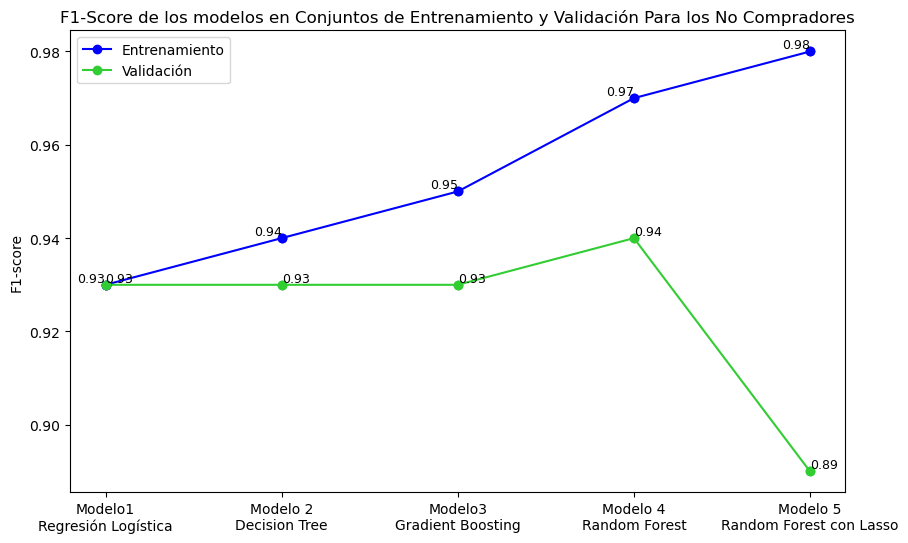

In [62]:
# Gráfico comparativo de F1-score en los conjuntos de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(modelos, f1_score_train_0, marker='o',color='blue' , label='Entrenamiento')
plt.plot(modelos, f1_score_test_0, marker='o', color='limegreen', label='Validación')
plt.title('F1-Score de los modelos en Conjuntos de Entrenamiento y Validación Para los No Compradores')
plt.ylabel('F1-score')
plt.xticks(rotation=0)
plt.legend()
# Graficar los puntos y agregar etiquetas de número
for i, (x, y) in enumerate(zip(modelos, f1_score_train_0)):
    plt.plot(x, y, marker='o', color='blue')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom')  # Agregar etiqueta de número

for i, (x, y) in enumerate(zip(modelos, f1_score_test_0)):
    plt.plot(x, y, marker='o', color='limegreen')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='left', va='bottom')  # Agregar etiqueta de número

plt.show()

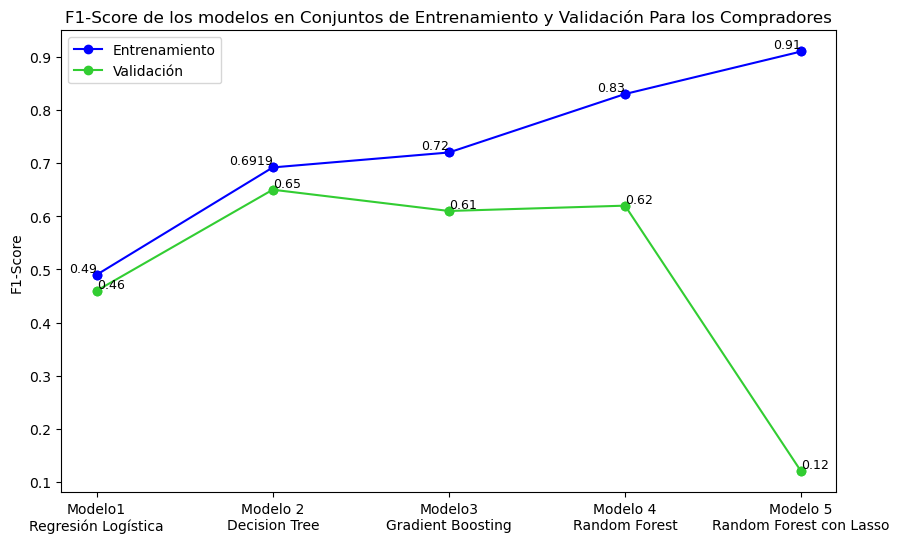

In [63]:
# Gráfico comparativo de F1-Score en los conjuntos de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(modelos, f1_score_train_1, marker='o',color='blue' , label='Entrenamiento')
plt.plot(modelos, f1_score_test_1, marker='o', color='limegreen', label='Validación')
plt.title('F1-Score de los modelos en Conjuntos de Entrenamiento y Validación Para los Compradores')
plt.ylabel('F1-Score')
plt.xticks(rotation=0)
plt.legend()
# Graficar los puntos y agregar etiquetas de número
for i, (x, y) in enumerate(zip(modelos, f1_score_train_1)):
    plt.plot(x, y, marker='o', color='blue')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom')  # Agregar etiqueta de número

for i, (x, y) in enumerate(zip(modelos, f1_score_test_1)):
    plt.plot(x, y, marker='o', color='limegreen')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='left', va='bottom')  # Agregar etiqueta de número

plt.show()

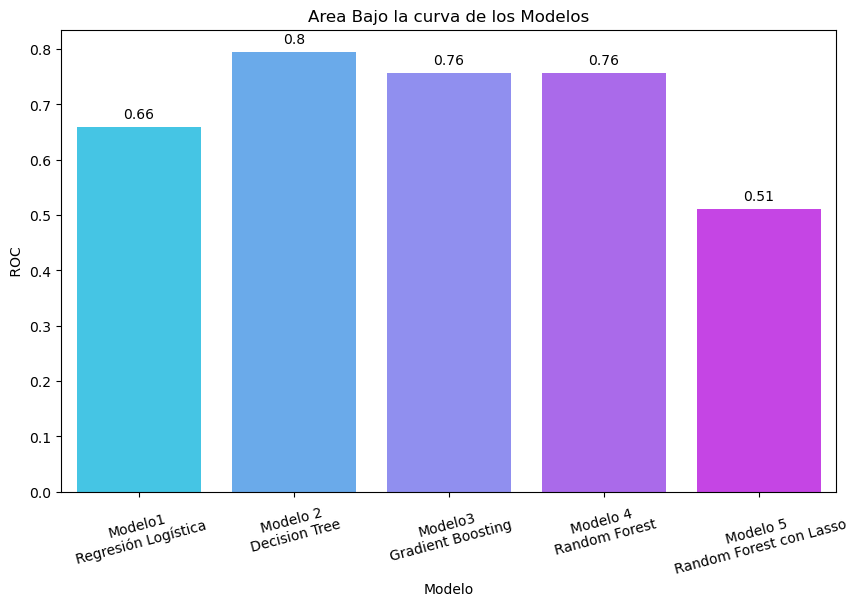

In [64]:
# Graficar el accuracy en los conjuntos de entrenamiento y prueba
plt.figure(figsize=(10, 6))
sns.barplot(x=modelos, y=auc_Roc,  palette='cool')
plt.title('Area Bajo la curva de los Modelos')
plt.xlabel('Modelo')
plt.ylabel(' ROC ')
plt.xticks(rotation=15)
for i, v in enumerate(auc_Roc):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10) 
plt.show()